In [1]:
import numpy as np
import h5py
from Data_Processing import *
from Utility import *
import os
import matplotlib.pyplot as plt

In [2]:
batch_size = 6
data_file = os.path.join(os.path.abspath('..'),'Data/NBA','Frame')
mask_file = os.path.join(os.path.abspath('..'),'Data/NBA','Sensing')
data_name = (data_file,mask_file)
pair_train, pair_test, pair_valid, mask, sample = Data_Division(data_name)
print pair_train
print pair_test
print pair_valid
print mask.shape,sample[0].shape,sample[1].shape

Group 0 with 71 samples step 1 is recorded
Group 1 with 299 samples step 3 is recorded
Group 2 with 138 samples step 3 is recorded
Group 3 with 351 samples step 3 is recorded
Group 4 with 211 samples step 3 is recorded
Group 5 with 118 samples step 3 is recorded
Group 6 with 67 samples step 3 is recorded
Group 7 with 99 samples step 2 is recorded
Group 8 with 153 samples step 2 is recorded
Test Group with 32 samples step 1 is recorded
([0, 1, 2, 3, 4, 5, 6, 7, 8], [(71, 1), (299, 3), (138, 3), (351, 3), (211, 3), (118, 3), (67, 3), (99, 2), (153, 2)])
([9], [(32, 1)])
([9], [(32, 1)])
(256, 256, 8) (4, 256, 256) (256, 256, 32)


In [3]:
data_generator = Data_Generator_File(data_name, pair_test, mask, batch_size, is_training=False)

File 9 Imported with Step 1 Samples Group 25 24
[0 1 2 3 4 5 6 7]
[ 8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23]
[24 25 26 27 28 29 30 31]
File 9 Imported with Step 1 Samples Group 25 24
[0 1 2 3 4 5 6 7]
[ 8  9 10 11 12 13 14 15]
(6, 256, 256, 1) (6, 256, 256, 8) (6, 256, 256, 8) [0, 8, 16, 24, 0, 8]
0.0 255.0 0.0 1558.1401584616115 0.0 1558.1401584616115
0.0 255.0 0.0 1253.6959164808284 0.0 1253.6959164808284
0.0 255.0 0.0 1489.061262993661 0.0 1489.061262993661
0.0 255.0 0.0 1330.2255476217038 0.0 1330.2255476217038
0.0 255.0 0.0 1558.1401584616115 0.0 1558.1401584616115
0.0 255.0 0.0 1253.6959164808284 0.0 1253.6959164808284


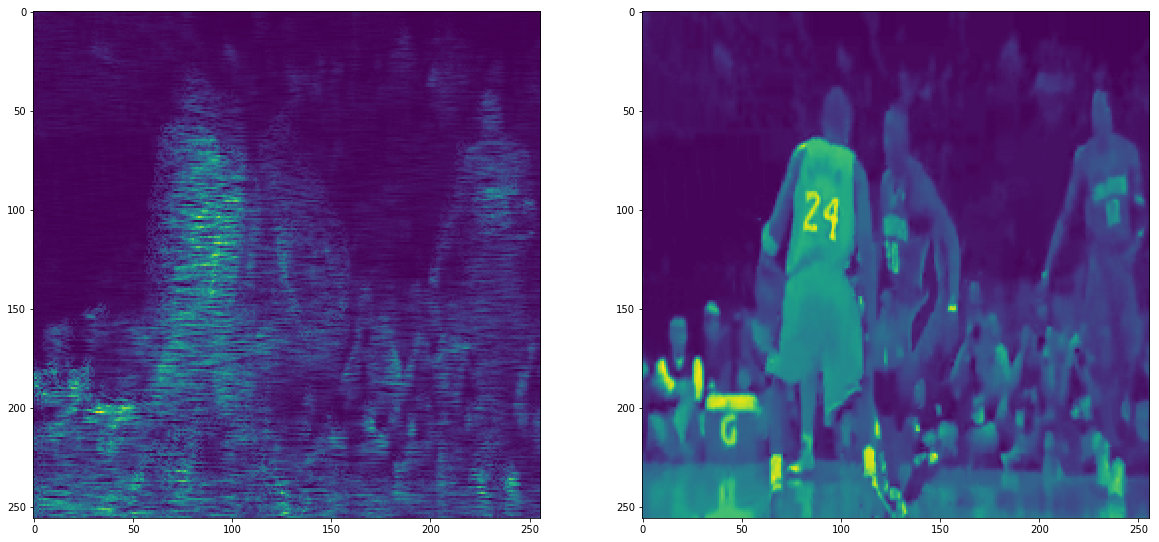

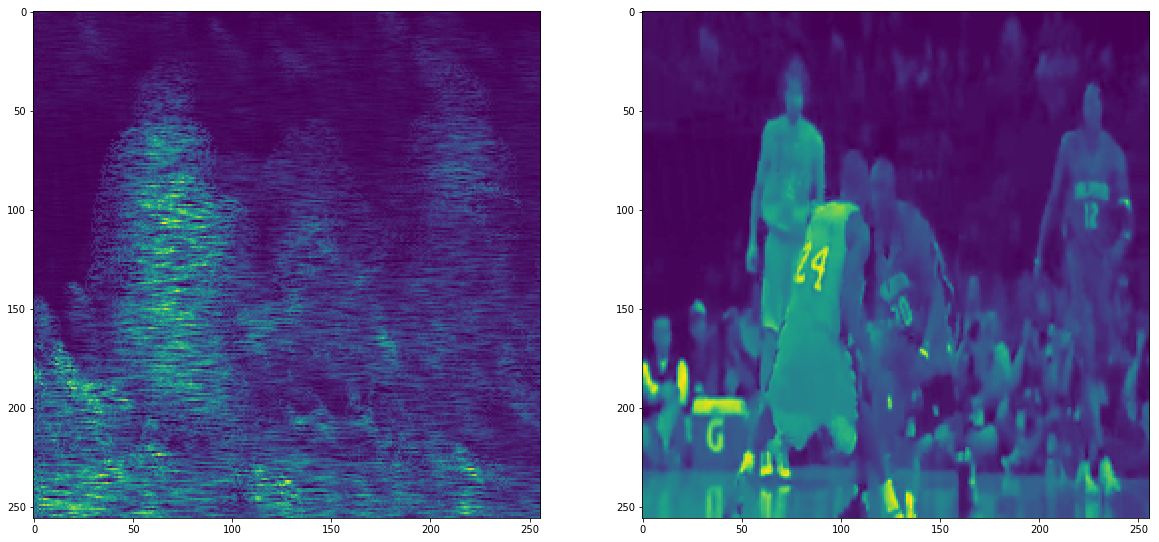

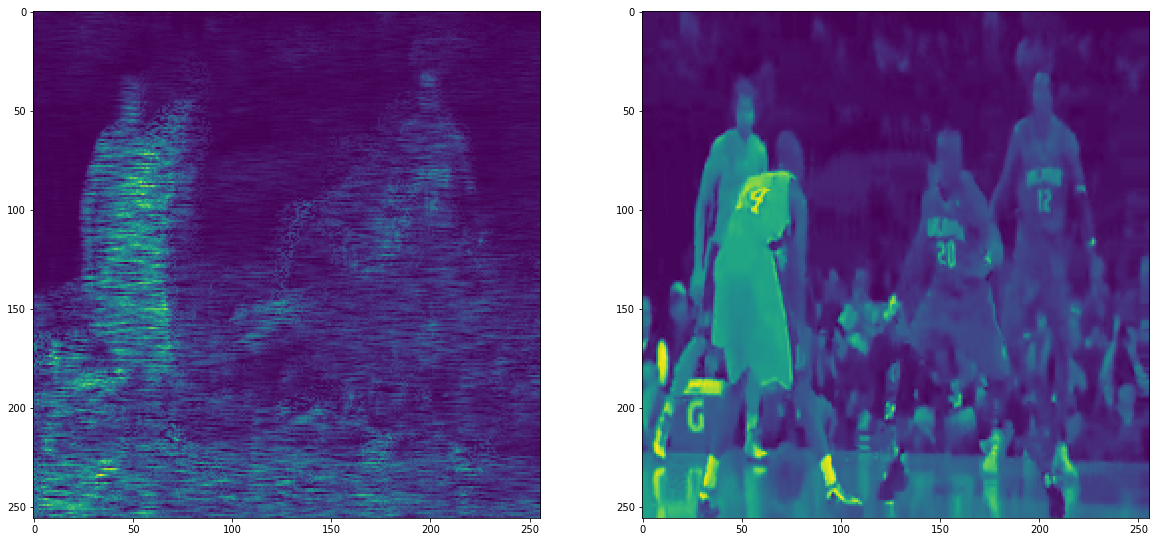

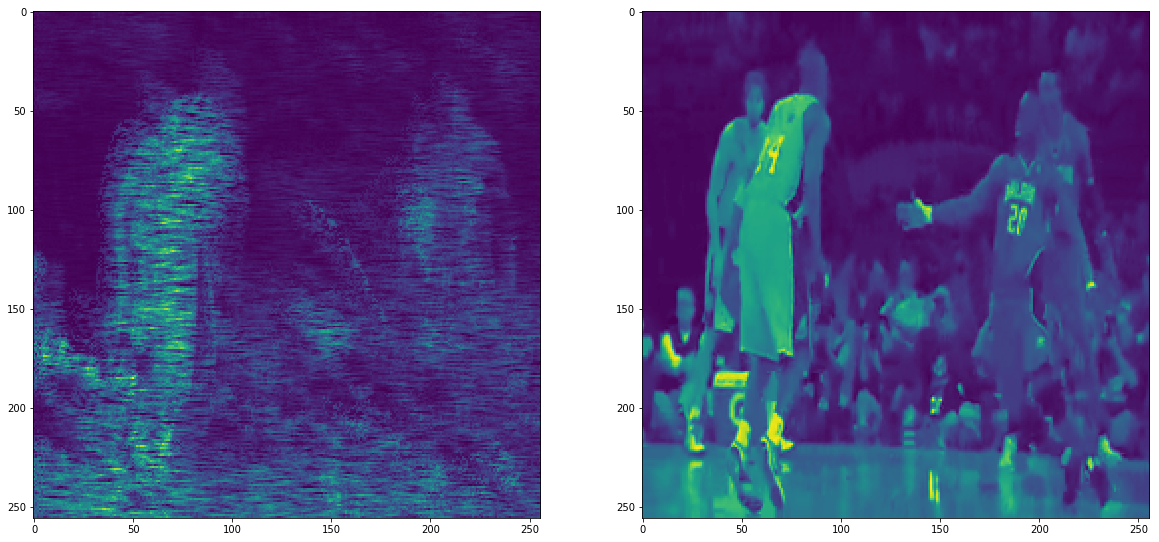

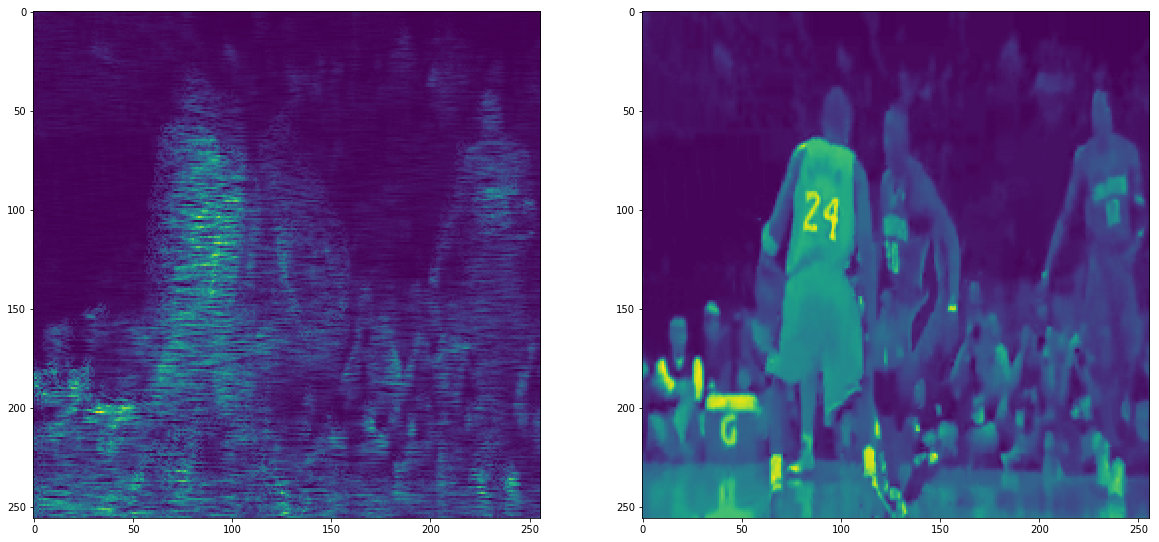

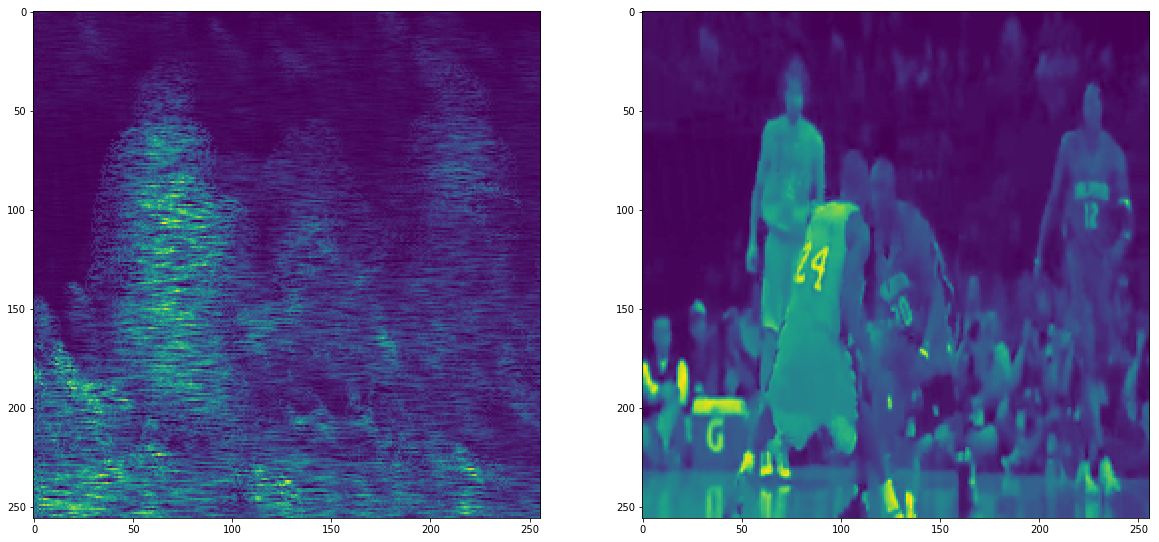

In [4]:
for _ in range(1):
    meas,ground,netinit,index = data_generator.next()
    print meas.shape,ground.shape,netinit.shape,index

for i in range(batch_size):
    print ground[i,:,:,:].min(),ground[i,:,:,:].max(),meas[i,:,:,:].min(),meas[i,:,:,:].max(),netinit[i,:,:,:].min(),netinit[i,:,:,:].max()
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(meas[i,:,:,0])
    plt.subplot(1,2,2)
    plt.imshow(ground[i,:,:,0])

In [3]:
scalar = limit_scalar(mask)
phi_cross = scalar.phi_cross
set_train,disp_train = scalar.normalization(pair_train)
set_test, disp_test  = scalar.normalization(pair_test)
set_valid,disp_valid = scalar.normalization(pair_valid)

train_size = int(np.ceil(float(disp_train[0])/batch_size))
test_size  = int(np.ceil(float(disp_test[0])/batch_size))
valid_size = int(np.ceil(float(disp_valid[0])/batch_size))

# Display the data structure of Training/Testing/Validation Dataset
print 'Available samples (batch) train %d(%d), valid %d(%d), test %d(%d)' % (
    disp_train[0],train_size,disp_valid[0],valid_size,disp_test[0],test_size)
print 'Test %d Samples: Meas Shape %s Ground Truth Size %s' % (sample[0].shape[0],sample[0].shape[1:],sample[1].shape)
     

Sensing mask Shape (256, 256, 8) Refer[0,1] [0.00,1.00]
Available samples (batch) train 1346(225), valid 25(5), test 25(5)
Extract 4 Samples: Meas Shape (256, 256) Ground Truth Size (256, 256, 32)


In [5]:
print mask[:5,:5,0]

[[1 0 0 1 1]
 [1 1 1 1 1]
 [0 1 1 0 1]
 [0 0 1 0 1]
 [0 0 0 1 0]]
